<a href="https://www.kaggle.com/code/melaneemelanee/vazan-deeplearning-housepricedata?scriptVersionId=97185226" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../input/vazan-housepricedata/housepricedata.csv')

In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
dataset=df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
X=dataset[:, 0:10]

In [7]:
Y=dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape,Y_val.shape, Y_test.shape )

(1022, 10) (219, 10) (219,) (219,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

2022-06-01 08:47:29.448990: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])



In [18]:
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=100,
                validation_data=(X_val, Y_val))

2022-06-01 08:47:29.682185: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6725 - accuracy: 0.4892 - val_loss: 0.6648 - val_accuracy: 0.5068
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.4912 - val_loss: 0.6584 - val_accuracy: 0.5114
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6595 - accuracy: 0.5078 - val_loss: 0.6521 - val_accuracy: 0.5982
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.6135 - val_loss: 0.6459 - val_accuracy: 0.6804
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.6683 - val_loss: 0.6396 - val_accuracy: 0.7032
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.6996 - val_loss: 0.6331 - val_accuracy: 0.7032
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.7094 - val_loss: 0.6266 - val_accuracy: 0.7215
Epoch 8/100
3

In [19]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.9087


0.9086757898330688

In [20]:
import matplotlib.pyplot as plt

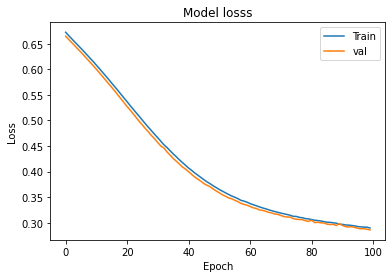

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model losss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

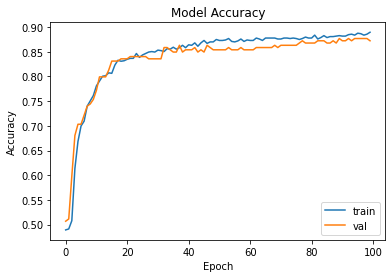

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc= 'lower right')
plt.show()

# Regularization

In [23]:
model_2 = Sequential([
    Dense(1000, activation = 'relu', input_shape=(10,)),
    Dense(1000, activation = 'relu'),
    Dense(1000, activation = 'relu'),
    Dense(1000, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

In [24]:
model_2.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
                    batch_size=32, epochs=100,
                    validation_data=(X_val, Y_val))
               

Epoch 1/100
32/32 [==============================] - 1s 22ms/step - loss: 0.4948 - accuracy: 0.7769 - val_loss: 0.4142 - val_accuracy: 0.7991
Epoch 2/100
32/32 [==============================] - 0s 16ms/step - loss: 0.3656 - accuracy: 0.8552 - val_loss: 0.3127 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 1s 17ms/step - loss: 0.3021 - accuracy: 0.8845 - val_loss: 0.2919 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2904 - accuracy: 0.8738 - val_loss: 0.2722 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 1s 16ms/step - loss: 0.2799 - accuracy: 0.8865 - val_loss: 0.2500 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 0s 15ms/step - loss: 0.2650 - accuracy: 0.8865 - val_loss: 0.2633 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 0s 16ms/step - loss: 0.2733 - accuracy: 0.8894 - val_loss: 0.2697 - val_accuracy: 0.8995
Epoch 

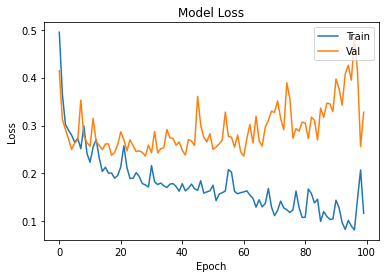

In [25]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

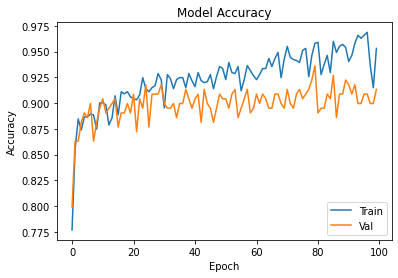

In [26]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Dropout

In [27]:
from keras.layers import Dropout

In [28]:
model_3 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dropout(0.5),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

In [29]:
model_3.compile(optimizer = 'adam',
               loss= 'binary_crossentropy',
               metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
                    batch_size=32, epochs=100,
                    validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 27ms/step - loss: 0.5641 - accuracy: 0.7074 - val_loss: 0.4132 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 1s 20ms/step - loss: 0.3857 - accuracy: 0.8317 - val_loss: 0.4039 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3560 - accuracy: 0.8532 - val_loss: 0.2976 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 19ms/step - loss: 0.3411 - accuracy: 0.8728 - val_loss: 0.2724 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3399 - accuracy: 0.8444 - val_loss: 0.2990 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3186 - accuracy: 0.8611 - val_loss: 0.2586 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3044 - accuracy: 0.8738 - val_loss: 0.2527 - val_accuracy: 0.8904
Epoch 

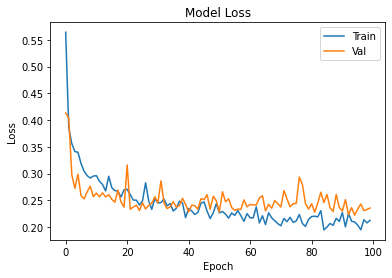

In [30]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

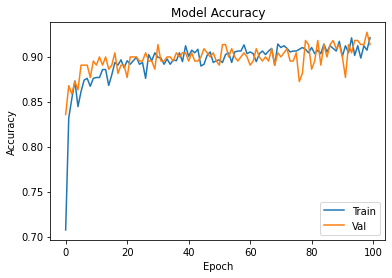

In [31]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()